# 1. Data Augmentation on Pytorch

In [21]:
import PIL
import numpy as np
import torch
import torchvision

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

In [23]:
!git clone https://github.com/fabioperez/pytorch-examples/

fatal: destination path 'pytorch-examples' already exists and is not an empty directory.


In [24]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

In [25]:
dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


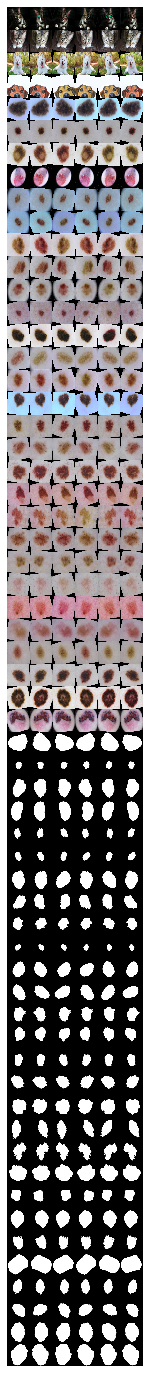

In [28]:
show_dataset(dataset)

# 2. imgaug 
if you want to perform more interesting augmentations, use 'imgaug'!

In [31]:
!pip install git+https://github.com/aleju/imgaug
from imgaug import augmenters as iaa
import imgaug as ia

  Cloning https://github.com/aleju/imgaug to /tmp/pip-req-build-4q6mbncc
  Running command git clone -q https://github.com/aleju/imgaug /tmp/pip-req-build-4q6mbncc
  Using cached Shapely-1.7.0-cp37-cp37m-manylinux1_x86_64.whl (1.8 MB)
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=960986 sha256=22dd38de0dc3c6535949658aaf1094a508c5bfa61fae57301fd7c6fe971e5cb9
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgarzdqo/wheels/24/09/69/f6547987407c2e85f9923e8e1189167fec80074ee5c6fe6ebd
Successfully built imgaug


In [32]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()

dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  warn_deprecated(msg, stacklevel=3)


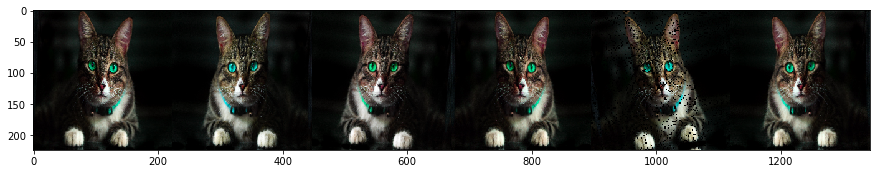

In [33]:
aug = iaa.Affine(rotate=(-40, 40), mode='symmetric')
imgs = [np.asarray(dataset[0][0]) for _ in range(6)]
aug.augment_images(imgs)
plt.imshow(np.hstack(imgs))

# 3. Mixing Pytorch and imgaug

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


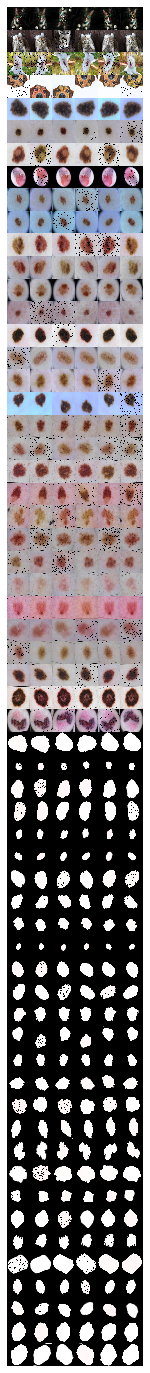

In [34]:
transforms = torchvision.transforms.Compose([
    ImgAugTransform(),
    lambda x: PIL.Image.fromarray(x),
    torchvision.transforms.RandomVerticalFlip()
])

dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

show_dataset(dataset)